# **Sentimen Analisis Review Aplikasi Mobile JKN**

Proyek ini bertujuan untuk melakukan analisis sentimen terhadap ulasan aplikasi Mobile JKN yang diambil dari Google Play Store. Dataset yang digunakan merupakan hasil scraping data ulasan pengguna yang telah dilakukan sebelumnya.

Analisis ini mencakup berbagai tahapan, seperti pengumpulan data, pembersihan teks, eksplorasi data, serta klasifikasi sentimen menjadi kategori positif, negatif, atau netral. Dengan menggunakan teknik pemrosesan teks (text preprocessing) dan algoritma machine learning, proyek ini diharapkan dapat memberikan wawasan yang berguna bagi pengembang aplikasi untuk memahami umpan balik pengguna dan meningkatkan kualitas layanan aplikasi.


### **Import Library**

In [3]:
!pip install sastrawi

In [102]:
!pip install scikit-learn

In [4]:
import nltk #Natural Language Toolkit (NLTK)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
from io import StringIO
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Memuat Dataset**

**Menampilkan Dataset Hasil Scraping**

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Scraping_.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cace4851-2514-4b6e-a39e-287cc28e5d5e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Untuk perubahan mudah, cumak untuk hasilnya zonk, sudah mengajukan lewat pandawa dan bpjs mobail sama saja, data hasil perbaruan data tidak berubah sama sekali, tolong di perbaiki lagi, saya ke susahan, sudah mengajukan data yg lengkap dan benar, tetapa saja hasilnya salah dan tidak ada bedanya ,sudah update aplikasinya sama saja gk ada perubahan. Thanks",3,0,NaN,2025-01-16 00:30:19,NaN,NaN,NaN
1,7c56deef-8ffe-4fa3-bcfd-000f18a17b64,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi apa sih ini? Kok busuk banget rasanya. Udah mah kalo verifikasi nyedot pulsa, tapi kodenya ga muncul² lagi, sekalinya muncul kalo keluar aplikasi malah ngulang dari awal. Malah kayak donasi ke pemerintah jadinya. Ga semua orang itu kaya, dikurang²i lah bug busuk kayak begini. Harusnya kalo ada bintang minus, udah saya kasih minus 10.000.",1,145,4.11.2,2025-01-15 13:37:40,NaN,NaN,4.11.2
2,72ab714b-f62b-4a36-9df2-1a090722d5d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Mau daftar aja susah sekali Verifikasi wajah ga pernah bisa, padahal sudah ditempat yang terang Kode yg dikirim lewat SMS juga ga pernah masuk, selalu gagal. Kalau mau urus ke kantor BPJS langsung, selalu diarahkan menggunakan aplikasi tapi aplikasinya seperti ini, gimana mau cepat beres kalau semua ga diupgrade. Lebih mudah mengisi data diaplikasi pemerintah yang lainnya.",1,131,4.11.2,2025-01-16 00:53:35,NaN,NaN,4.11.2
3,58092196-abc1-48ff-b07a-53b0b16715ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasiii apaann, malah ribet. Verifikasi no hp sulit, verifikasi wajah sulit. Lain kali klo bikin aplikasi itu yg niat. Aplikasi di gunain bwt mempermudah, ini malah di persulit. Sinyal udah oke pulsa ada, jaringan oke tpi tetep aja nggk bisa terverifikasi. TOLONG DI PERBAIKI SECEPATNYA",1,115,4.11.2,2025-01-17 09:33:26,NaN,NaN,4.11.2
4,b746b7d9-d28e-4142-90b9-c50664433bba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"1. Susah verif muka. Padahal lighting sudah terang, background plain, koneksi bagus, kamera ok. 2. Susah bgt dpt OTP. Dari okt 24 sampai ulasan saya ditulis ini, saya belum berhasil mendapat OTP padahal kartu aktif, pulsa ada, nomor benar, koneksi apalagi. Nyoba alternatif via email, langsung masuk. Tp kl mau lanjut ke next step ttp hrs lewat no.hp sedangkan berkali2 dicoba gak bisa. Knp dibuat email yg opsional bisa nerima kode? Ayolah, solusinya apa ini?",1,51,4.11.2,2025-01-20 12:12:53,NaN,NaN,4.11.2


In [61]:
# Menampilkan informasi tentang DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211500 entries, 0 to 211499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              211500 non-null  object
 1   userName              211500 non-null  object
 2   userImage             211500 non-null  object
 3   content               211499 non-null  object
 4   score                 211500 non-null  int64 
 5   thumbsUpCount         211500 non-null  int64 
 6   reviewCreatedVersion  185776 non-null  object
 7   at                    211500 non-null  object
 8   replyContent          132030 non-null  object
 9   repliedAt             132030 non-null  object
 10  appVersion            185776 non-null  object
dtypes: int64(2), object(9)
memory usage: 17.7+ MB


In [62]:
df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,1
score,0
thumbsUpCount,0
reviewCreatedVersion,25724
at,0
replyContent,79470
repliedAt,79470


**Membesihkan data dengan Menghapus Data Kosong **

In [63]:
clean_df = df.dropna()
clean_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


In [64]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
8,6647c1d6-7e8b-47dc-9bbc-27a342a9cfdd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Yang benerlah developing softwarenya, udah bagus kualitas foto dan kondisi masih ga di recognize waktu daftar. OTP ga optimal ada WA etc software supported masih pake sms, kurang optimal dan costnya lebih malahan. Ini bikin software niat kaga sih, atau cuman formalitas.",1,27,4.11.2,2025-01-14 13:38:34,Mohon maaf atas ketidaknyamanannya. BPJS Kesehatan berusaha memberikan keamanan kepada peserta saat melakukan registrasi maupun transaksi di mobile JKN dengan proses verifikasi melalui SMS. Verifikasi melalui SMS merupakan upaya dalam memberikan perlindungan terhadap data peserta dari orang lain yang tidak bertanggung jawab. Terima kasih.,2025-01-23 03:24:44,4.11.2
10,56f68b2a-1d2f-4860-b57a-52f6e5c4cbec,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"saya mau komplain baik baik 1. Gak perlu verifikasi wajah karena difaskes kita daftar pake sidik jari. Ini baru mau make aplilasi jangan dipersulit, tujuannya kan untuk mempermudah. 2. Gak perlu harus sms dan kuota aktif, pakai WA sudah cukup karena WA tentu pakai no yang sama dengan yang didaftar. 3. Kode OTP bisa dikirim ke WA dan ke Email, Facebook yang makai Ratusan juta orang saja untuk perbaiki akun yang diblokir cukup pakai WA dan Email.",1,10,4.11.2,2025-01-17 21:52:56,Mohon maaf atas ketidaknyamanannya. Pastikan jaringan baik dan No HP yang terdaftar adalah no HP prabayar yang aktif dengan pulsa yang mencukupi agar kode OTP dapat masuk.Terima kasih.,2024-10-09 03:55:20,4.11.2
29,fe8bc8cd-9172-4d79-bd2d-faa55680fbab,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Capek banget dari tadi mau mendaftar aja sulit banget. Ngebug terusss Susah banget buat dapat otp sms padahal udah dapat dari gmail. Kenapa harus dapat otp juga dari no.hp Apalagi mau verifikasi susah banget padahal udah dilokasih yang terang tapi tetap gak bisa verifikasi wajah. Tolong diperbaiki sistem aplikasinya. Bukannya mempercepat malah makin lambattt,1,959,4.11.2,2025-01-08 07:35:45,Mohon maaf atas ketidaknyamanannya. Pastikan jaringan baik dan No HP yang terdaftar adalah no HP prabayar yang aktif dengan pulsa yang mencukupi agar kode OTP dapat masuk.Terima kasih.,2025-01-24 04:18:32,4.11.2
31,aa7a4251-36c2-4da7-83a4-2a0bc0b1276d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Perlu di tingkatkan lagi untuk peforma apk, karena semua pengguna tidak sepenuhnya melek teknologi. Ketika daftar akun waktu verifikasi wajah gagal terus karena membutuhkan penerangan yang sangat cukup seperti harus butuh lampu penerangan yang besar baru bisa. Dan untuk verifikasi akun dari segi nomor telepon dan email yg dicantumkan tidak sama saat waktu kirim kode OTP ketika daftar. Jadi bingung ketika mau update data / ganti nomor/email tersebut karena di fiturnya tidak di sediakan.",2,297,4.11.2,2025-01-06 08:45:55,Mohon maaf atas ketidaknyamanannya. Pastikan jaringan baik dan No HP yang terdaftar adalah no HP prabayar yang aktif dengan pulsa yang mencukupi agar kode OTP dapat masuk.Terima kasih.,2025-01-24 07:43:02,4.11.2
32,a7ea36a8-5cbf-4139-8b3f-da7b9713948f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah update aplikasi malah lemot, tambah ribet, data yg dulu malah harus memperbarui lagi.... Muter2 ae Harusnya 1 no HP sudah cukup, sedangkan yg ditanggung tidak perlu diisi no. HP juga GK masalah, jadinya kayak dipersulit mau dapat layanan JKN mobile. Pulsa masih banyak, tapi GK da

In [65]:
clean_df.shape

(115646, 11)

## **Preprocessing**

**Proses Pembersihan dan Pemrosesan Teks pada Dataset**

In [66]:
# Fungsi untuk membersihkan teks dari berbagai elemen yang tidak diperlukan
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus mention (@username)
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag (#tag)
    text = re.sub(r'RT[\s]', '', text) # Menghapus "RT" (retweet)
    text = re.sub(r"http\S+", '', text) # Menghapus tautan/link
    text = re.sub(r'[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus karakter spesial kecuali huruf dan angka
    text = text.replace('\n', ' ') # Mengganti baris baru (\n) dengan spasi
    text = text.strip() # Menghapus spasi berlebih di awal dan akhir teks
    return text

# Fungsi untuk mengubah semua huruf dalam teks menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

# Fungsi untuk memecah teks menjadi daftar token (kata-kata)
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Fungsi untuk menghapus kata-kata yang termasuk dalam daftar stopwords
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian')) # Mengambil daftar stopwords dalam bahasa Indonesia
    listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'])
    filtered = [word for word in text if word not in listStopwords]
    return filtered

# Fungsi untuk melakukan stemming (mengubah kata ke bentuk dasar)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Fungsi untuk mengubah daftar kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

**slangwords**

**Menangani Slang Words pada Teks**

In [75]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [76]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [77]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
8,6647c1d6-7e8b-47dc-9bbc-27a342a9cfdd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Yang benerlah developing softwarenya, udah bagus kualitas foto dan kondisi masih ga di recognize waktu daftar. OTP ga optimal ada WA etc software supported masih pake sms, kurang optimal dan costnya lebih malahan. Ini bikin software niat kaga sih, atau cuman formalitas.",1,27,4.11.2,2025-01-14 13:38:34,Mohon maaf atas ketidaknyamanannya. BPJS Kesehatan berusaha memberikan keamanan kepada peserta saat melakukan registrasi maupun transaksi di mobile JKN dengan proses verifikasi melalui SMS. Verifikasi melalui SMS merupakan upaya dalam memberikan perlindungan terhadap data peserta dari orang lain yang tidak bertanggung jawab. Terima kasih.,2025-01-23 03:24:44,4.11.2
10,56f68b2a-1d2f-4860-b57a-52f6e5c4cbec,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"saya mau komplain baik baik 1. Gak perlu verifikasi wajah karena difaskes kita daftar pake sidik jari. Ini baru mau make aplilasi jangan dipersulit, tujuannya kan untuk mempermudah. 2. Gak perlu harus sms dan kuota aktif, pakai WA sudah cukup karena WA tentu pakai no yang sama dengan yang didaftar. 3. Kode OTP bisa dikirim ke WA dan ke Email, Facebook yang makai Ratusan juta orang saja untuk perbaiki akun yang diblokir cukup pakai WA dan Email.",1,10,4.11.2,2025-01-17 21:52:56,Mohon maaf atas ketidaknyamanannya. Pastikan jaringan baik dan No HP yang terdaftar adalah no HP prabayar yang aktif dengan pulsa yang mencukupi agar kode OTP dapat masuk.Terima kasih.,2024-10-09 03:55:20,4.11.2
29,fe8bc8cd-9172-4d79-bd2d-faa55680fbab,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Capek banget dari tadi mau mendaftar aja sulit banget. Ngebug terusss Susah banget buat dapat otp sms padahal udah dapat dari gmail. Kenapa harus dapat otp juga dari no.hp Apalagi mau verifikasi susah banget padahal udah dilokasih yang terang tapi tetap gak bisa verifikasi wajah. Tolong diperbaiki sistem aplikasinya. Bukannya mempercepat malah makin lambattt,1,959,4.11.2,2025-01-08 07:35:45,Mohon maaf atas ketidaknyamanannya. Pastikan jaringan baik dan No HP yang terdaftar adalah no HP prabayar yang aktif dengan pulsa yang mencukupi agar kode OTP dapat masuk.Terima kasih.,2025-01-24 04:18:32,4.11.2
31,aa7a4251-36c2-4da7-83a4-2a0bc0b1276d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Perlu di tingkatkan lagi untuk peforma apk, karena semua pengguna tidak sepenuhnya melek teknologi. Ketika daftar akun waktu verifikasi wajah gagal terus karena membutuhkan penerangan yang sangat cukup seperti harus butuh lampu penerangan yang besar baru bisa. Dan untuk verifikasi akun dari segi nomor telepon dan email yg dicantumkan tidak sama saat waktu kirim kode OTP ketika daftar. Jadi bingung ketika mau update data / ganti nomor/email tersebut karena di fiturnya tidak di sediakan.",2,297,4.11.2,2025-01-06 08:45:55,Mohon maaf atas ketidaknyamanannya. Pastikan jaringan baik dan No HP yang terdaftar adalah no HP prabayar yang aktif dengan pulsa yang mencukupi agar kode OTP dapat masuk.Terima kasih.,2025-01-24 07:43:02,4.11.2
32,a7ea36a8-5cbf-4139-8b3f-da7b9713948f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah update aplikasi malah lemot, tambah ribet, data yg dulu malah harus memperbarui lagi.... Muter2 ae Harusnya 1 no HP sudah cukup, sedangkan yg ditanggung tidak perlu diisi no. HP juga GK masalah, jadinya kayak dipersulit mau dapat layanan JKN mobile. Pulsa masih banyak, tapi GK da

**Pembersihan Teks pada Data**

In [78]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

<ipython-input-78-58d3c2d22f2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
<ipython-input-78-58d3c2d22f2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
<ipython-input-78-58d3c2d22f2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

##**Pelabelan**

**Membaca dan Memuat Kamus Kata Positif dan Negatif untuk Analisis Sentimen**

In [79]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

**Analisis Sentimen Menggunakan Lexicon-Based dan SentimentIntensityAnalyzer pada Teks**

In [80]:
# Fungsi untuk menganalisis sentimen teks menggunakan kombinasi lexicon-based dan SentimentIntensityAnalyzer
def analyze_sentiment(text):
    # Menghitung skor sentimen menggunakan lexicon-based
    positive_score = sum(lexicon_positive.get(word, 0) for word in text.split())
    negative_score = sum(lexicon_negative.get(word, 0) for word in text.split())

    # Menentukan sentimen berdasarkan skor lexicon-based
    if positive_score > negative_score and positive_score > 0:
        return "Positif"
    elif negative_score > positive_score and negative_score > 0:
        return "Negatif"
    else:
        # Jika tidak dapat ditentukan menggunakan lexicon-based, gunakan SentimentIntensityAnalyzer
        sia = SentimentIntensityAnalyzer()
        sentiment_score = sia.polarity_scores(text)
        compound_score = sentiment_score['compound']

        # Menyesuaikan ambang batas
        if compound_score > 0.05:
            return "Positif"
        elif compound_score < -0.05:
            return "Negatif"
        else:
            return "Netral"

# Menggunakan fungsi analyze_sentiment untuk menganalisis sentimen dalam kolom "text_akhir" DataFrame
clean_df['Sentiment'] = clean_df['text_akhir'].apply(analyze_sentiment) # Assuming the column containing text is actually named 'text_akhir'
# Menampilkan distribusi sentimen
print(clean_df['Sentiment'].value_counts())

# Menyimpan hasil analisis sentimen ke dalam file CSV
clean_df.to_csv('sentiment_analysis_result.csv', index=False)

# Menampilkan beberapa baris pertama hasil analisis sentimen
print(clean_df.head())

<ipython-input-80-23fc7d8d2bae>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Sentiment'] = clean_df['text_akhir'].apply(analyze_sentiment) # Assuming the column containing text is actually named 'text_akhir'


Sentiment
Positif    89731
Netral     24909
Negatif     1006
Name: count, dtype: int64
                                reviewId         userName  \
8   6647c1d6-7e8b-47dc-9bbc-27a342a9cfdd  Pengguna Google   
10  56f68b2a-1d2f-4860-b57a-52f6e5c4cbec  Pengguna Google   
29  fe8bc8cd-9172-4d79-bd2d-faa55680fbab  Pengguna Google   
31  aa7a4251-36c2-4da7-83a4-2a0bc0b1276d  Pengguna Google   
32  a7ea36a8-5cbf-4139-8b3f-da7b9713948f  Pengguna Google   

                                                                                                                   userImage  \
8   https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
10  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
29  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
31  https://play-lh.googleusercont

**Menampilkan Jumlah Sentimen**

In [82]:
sentiment_counts = clean_df['Sentiment'].value_counts()

# Menampilkan hasil jumlah sentimen
print("Jumlah Sentimen:")
print(f"Positif: {sentiment_counts.get('Positif', 0)}")
print(f"Negatif: {sentiment_counts.get('Negatif', 0)}")
print(f"Netral: {sentiment_counts.get('Netral', 0)}")

Jumlah Sentimen:
Positif: 89731
Negatif: 1006
Netral: 24909


**Visualisasi Pie Chart Sentimen Positif, Negatif, dan Netral pada Data Ulasan**

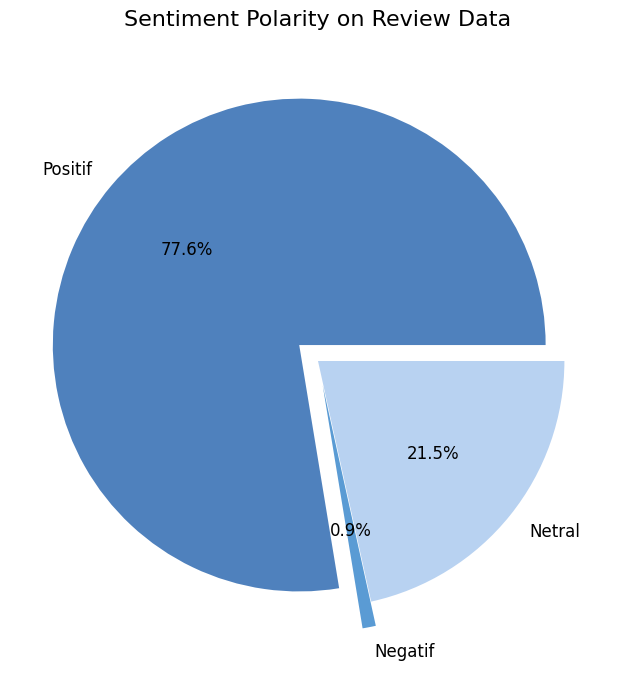

In [83]:
fig, ax = plt.subplots(figsize=(10, 8))

# Menghitung jumlah sentimen Positif, Negatif, dan Netral
sentiment_counts = clean_df['Sentiment'].value_counts()

# Menyiapkan data untuk pie chart
labels = ['Positif', 'Negatif', 'Netral']
sizes = [
    sentiment_counts.get('Positif', 0),
    sentiment_counts.get('Negatif', 0),
    sentiment_counts.get('Netral', 0)
]
colors = ['#4f81bd', '#5a9bd4', '#b8d2f1']
explode = (0.1, 0.1, 0)

# Membuat pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode,colors=colors, textprops={'fontsize': 12})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()


**Menampilkan Ulasan Positif Berdasarkan Sentimen pada DataFrame**

In [84]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['Sentiment'] == 'Positif']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'Sentiment','text_stopword']]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1
positive_tweets.head()

,text_akhir,Sentiment,text_stopword
1,benerlah developing softwarenya bagus kualitas foto kondisi recognize daftar otp optimal wa etc software supported pakai sms optimal costnya bikin software niat cuman formalitas,Positif,"[benerlah, developing, softwarenya, bagus, kualitas, foto, kondisi, recognize, daftar, otp, optimal, wa, etc, software, supported, pakai, sms, optimal, costnya, bikin, software, niat, cuman, formalitas]"
2,komplain verifikasi wajah difaskes daftar pakai sidik jari make aplilasi dipersulit tujuannya mempermudah sms kuota aktif pakai wa wa pakai no didaftar kode otp dikirim wa email facebook makai ratusan juta orang perbaiki akun diblokir pakai wa email,Positif,"[komplain, verifikasi, wajah, difaskes, daftar, pakai, sidik, jari, make, aplilasi, dipersulit, tujuannya, mempermudah, sms, kuota, aktif, pakai, wa, wa, pakai, no, didaftar, kode, otp, dikirim, wa, email, facebook, makai, ratusan, juta, orang, perbaiki, akun, diblokir, pakai, wa, email]"
3,capek banget mendaftar sulit banget ngebug terusss susah banget otp sms gmail otp nohp verifikasi susah banget dilokasih terang verifikasi wajah tolong diperbaiki sistem aplikasinya mempercepat lambattt,Positif,"[capek, banget, mendaftar, sulit, banget, ngebug, terusss, susah, banget, otp, sms, gmail, otp, nohp, verifikasi, susah, banget, dilokasih, terang, verifikasi, wajah, tolong, diperbaiki, sistem, aplikasinya, mempercepat, lambattt]"
4,tingkatkan peforma apk pengguna sepenuhnya melek teknologi daftar akun verifikasi wajah gagal membutuhkan penerangan butuh lampu penerangan verifikasi akun segi nomor telepon email dicantumkan kirim kode otp daftar bingung update data ganti nomoremail fiturnya sediakan,Positif,"[tingkatkan, peforma, apk, pengguna, sepenuhnya, melek, teknologi, daftar, akun, verifikasi, wajah, gagal, membutuhkan, penerangan, butuh, lampu, penerangan, verifikasi, akun, segi, nomor, telepon, email, dicantumkan, kirim, kode, otp, daftar, bingung, update, data, ganti, nomoremail, fiturnya, sediakan]"
5,update aplikasi lambat ribet data memperbarui muter ae no hp ditanggung diisi no hp gk kayak dipersulit layanan jkn mobile pulsa gk sms verifikasi verifikasi pakai wa pilihannya terlanjur diisi pulsa gk bisadapat sms verifikasi,Positif,"[update, aplikasi, lambat, ribet, data, memperbarui, muter, ae, no, hp, ditanggung, diisi, no, hp, gk, kayak, dipersulit, layanan, jkn, mobile, pulsa, gk, sms, verifikasi, verifikasi, pakai, wa, pilihannya, terlanjur, diisi, pulsa, gk, bisadapat, sms, verifikasi]"


**Menampilkan Ulasan Negatif Berdasarkan Sentimen pada DataFrame**

In [109]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['Sentiment'] == 'Negatif']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'Sentiment','text_stopword']]

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1
negative_tweets

,text_akhir,Sentiment,text_stopword
1,emang bikin aplikasi fitur verifikasi wajah hapus nyoba berkali kali aplikasinya crash melulu,Negatif,"[emang, bikin, aplikasi, fitur, verifikasi, wajah, hapus, nyoba, berkali, kali, aplikasinya, crash, melulu]"
2,aplikasinya jelek bnget we admin knapa kirimkan kode verifikasi no telpon no tlpon verifikasi wajah susah gagal,Negatif,"[aplikasinya, jelek, bnget, we, admin, knapa, kirimkan, kode, verifikasi, no, telpon, no, tlpon, verifikasi, wajah, susah, gagal]"
3,auto clickers hp standar apa²in garansi toko ub laja install aplikasi aneh² bisa²nya dibilang risk,Negatif,"[auto, clickers, hp, standar, apa²in, garansi, toko, ub, laja, install, aplikasi, aneh², bisa²nya, dibilang, risk]"
4,sms verifikasi susah masuk dimasukan error scan wajah terbaca,Negatif,"[sms, verifikasi, susah, masuk, dimasukan, error, scan, wajah, terbaca]"
5,update login mengunakan no bpjssedangkan login nik gagal,Negatif,"[update, login, mengunakan, no, bpjssedangkan, login, nik, gagal]"
6,aplikasi error susahengak masuk aplikasi gangguan pembenahan,Negatif,"[aplikasi, error, susahengak, masuk, aplikasi, gangguan, pembenahan]"
7,akibatnya pajak alokasi terbesarnya pertahanan kepolisian ginian mah loss,Negatif,"[akibatnya, pajak, alokasi, terbesarnya, pertahanan, kepolisian, ginian, mah, loss]"
8,gakbisa verifikasi wajah gakbisa masuk aplikasi stuck aplikasi,Negatif,"[gakbisa, verifikasi, wajah, gakbisa, masuk, aplikasi, stuck, aplikasi]"
9,verifikasi no wa kode terussegeraperbaiki masyarakat menggunakannya,Negatif,"[verifikasi, no, wa, kode, terussegeraperbaiki, masyarakat, menggunakannya]"
10,apk hapus gk ny no hp suruh wa gk ny,Negatif,"[apk, hapus, gk, ny, no, hp, suruh, wa, gk, ny]"


**Menampilkan Ulasan Netral Berdasarkan Sentimen pada DataFrame**

In [86]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas netral.
neutral_tweets = clean_df[clean_df['Sentiment'] == 'Netral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'Sentiment', 'text_stopword']]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

# Menampilkan DataFrame hasil.
neutral_tweets.head()


,text_akhir,Sentiment,text_stopword
1,aplikasi susahhh mempermudah mempersulit sms kode otp masuk² diisi pulsa verifikasi wajah bisatolong diupdate cuman liat² komenannya,Netral,"[aplikasi, susahhh, mempermudah, mempersulit, sms, kode, otp, masuk², diisi, pulsa, verifikasi, wajah, bisatolong, diupdate, cuman, liat², komenannya]"
2,gabisa verifikasi wajah stuk klik gabisa close gabisa aplikasi gabisa komplain terkait verifikasi lanjutannya,Netral,"[gabisa, verifikasi, wajah, stuk, klik, gabisa, close, gabisa, aplikasi, gabisa, komplain, terkait, verifikasi, lanjutannya]"
3,aplikasi kacaurisk keylogger update gunamasa kaspersky av disuruh matiin gegara aplikasi sampah disuruh verifikasi wajah aplikasi force close sumpahit dev app kebangetan bloon x update gini²,Netral,"[aplikasi, kacaurisk, keylogger, update, gunamasa, kaspersky, av, disuruh, matiin, gegara, aplikasi, sampah, disuruh, verifikasi, wajah, aplikasi, force, close, sumpahit, dev, app, kebangetan, bloon, x, update, gini²]"
4,keamanannya pakai sidik jari pin ditambah verifikasi wajah ujungnya gagal kontrol,Netral,"[keamanannya, pakai, sidik, jari, pin, ditambah, verifikasi, wajah, ujungnya, gagal, kontrol]"
5,kayak apps ojol verifikasi wajah bug identifikasi wajah aplikasi berhenti melulu,Netral,"[kayak, apps, ojol, verifikasi, wajah, bug, identifikasi, wajah, aplikasi, berhenti, melulu]"


**Visualisasi Word Cloud dari Ulasan yang Telah Dikelola**

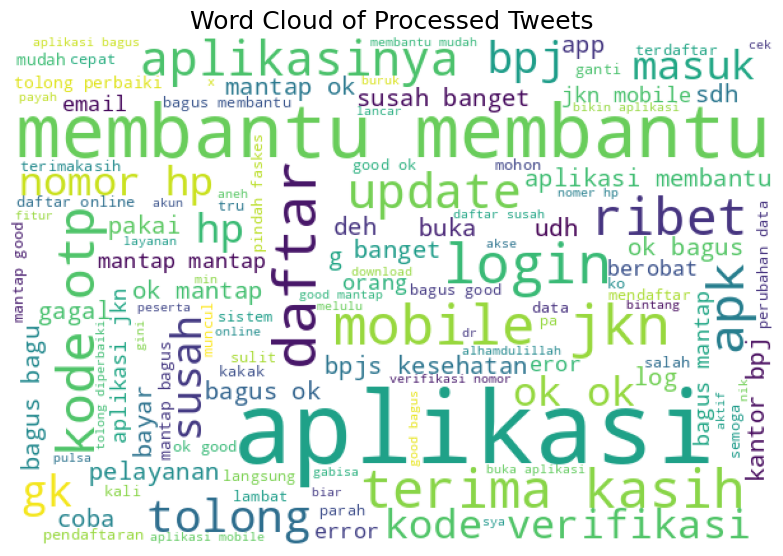

In [87]:
# Membuat string kosong 'list_words' yang akan mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap teks dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Memastikan bahwa 'tweet' adalah string dan memecahnya menjadi kata-kata
    # 'tweet' sudah dalam bentuk list setelah proses stopword,
    # jadi kita perlu menggabungkannya menjadi string terlebih dahulu
    list_words += ' ' + ' '.join(tweet)  # Menggabungkan list tweet menjadi string
# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Processed Tweets', fontsize=18)
# Menonaktifkan grid pada sumbu.
ax.grid(False)
# Menampilkan word cloud dalam gambar.
ax.imshow(wordcloud)
# Mengatur layout gambar.
fig.tight_layout(pad=0)
# Menyembunyikan sumbu.
ax.axis('off')
plt.show()

**Visualisasi Word Cloud dari Ulasan Negatif yang Telah Dikelola**

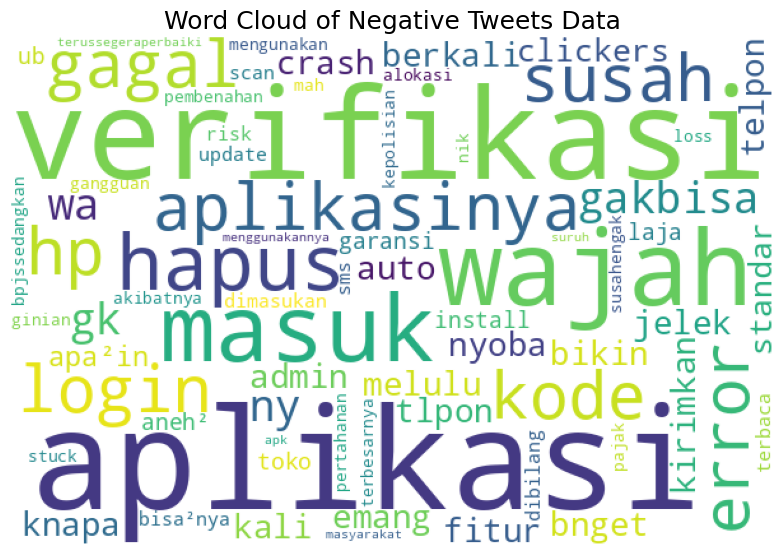

In [88]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

**Visualisasi Word Cloud dari Ulasan Positif yang Telah Dikelola**

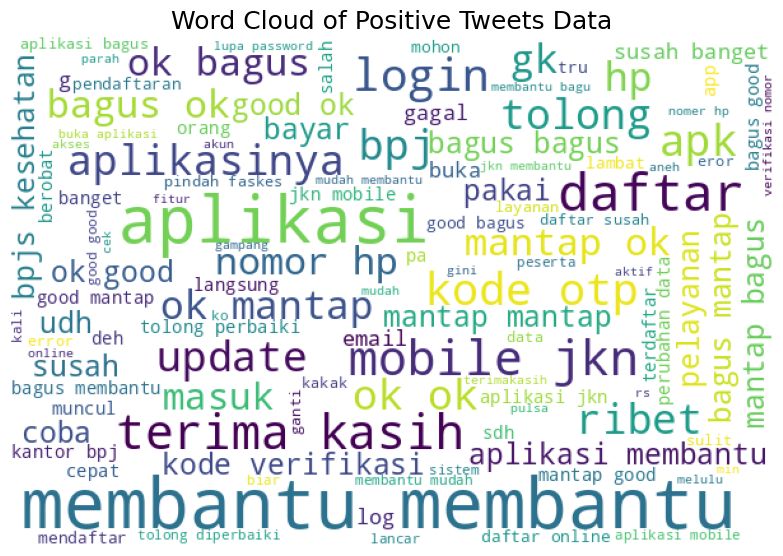

In [112]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''
# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))
# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

**Visualisasi Word Cloud dari Ulasan Netral yang Telah Dikelola**

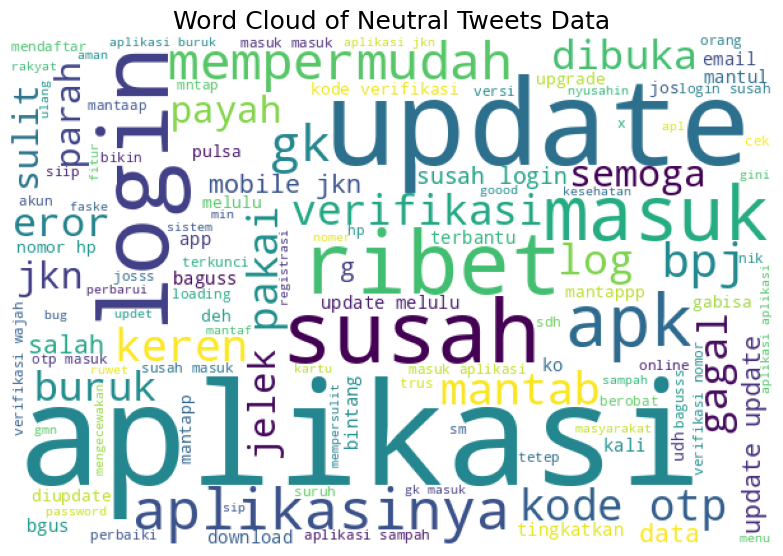

In [113]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))
# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

**Visualisasi Analisis Sentimen dan Distribusi Teks**

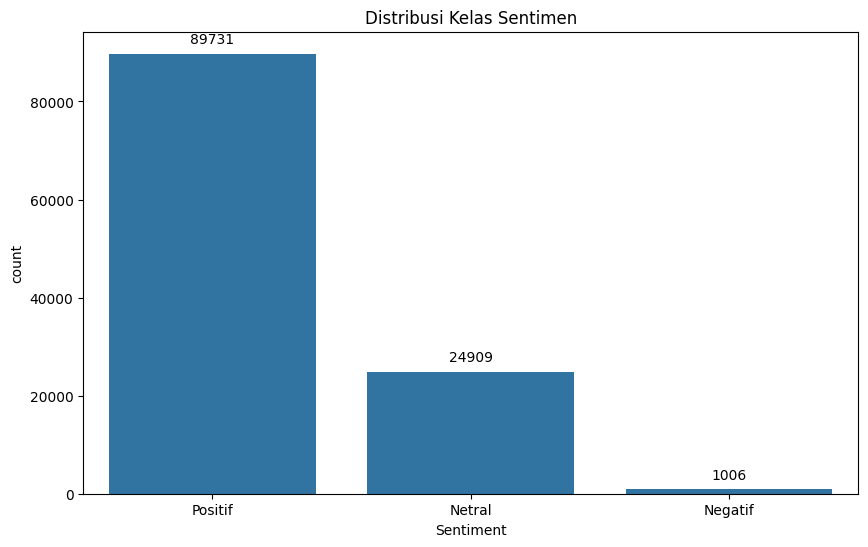

<ipython-input-90-a5b3931b34f4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))  # Menghitung panjang teks


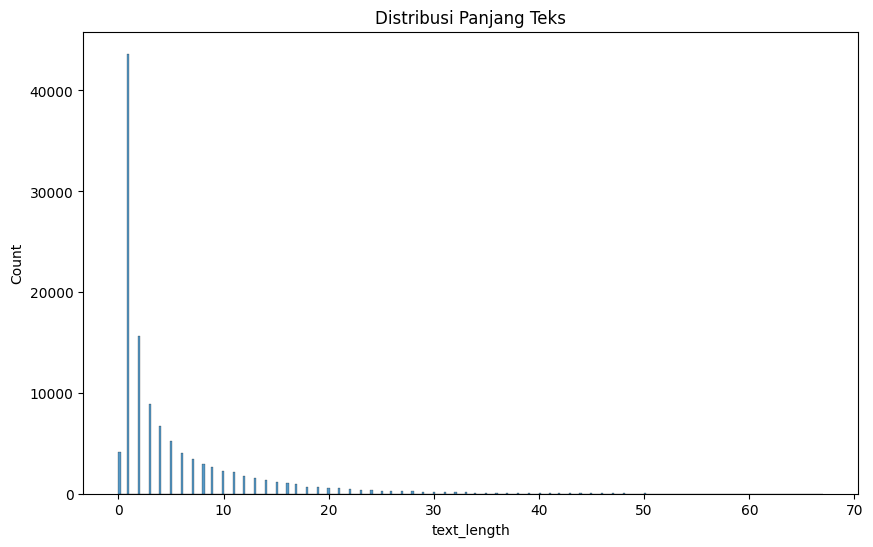

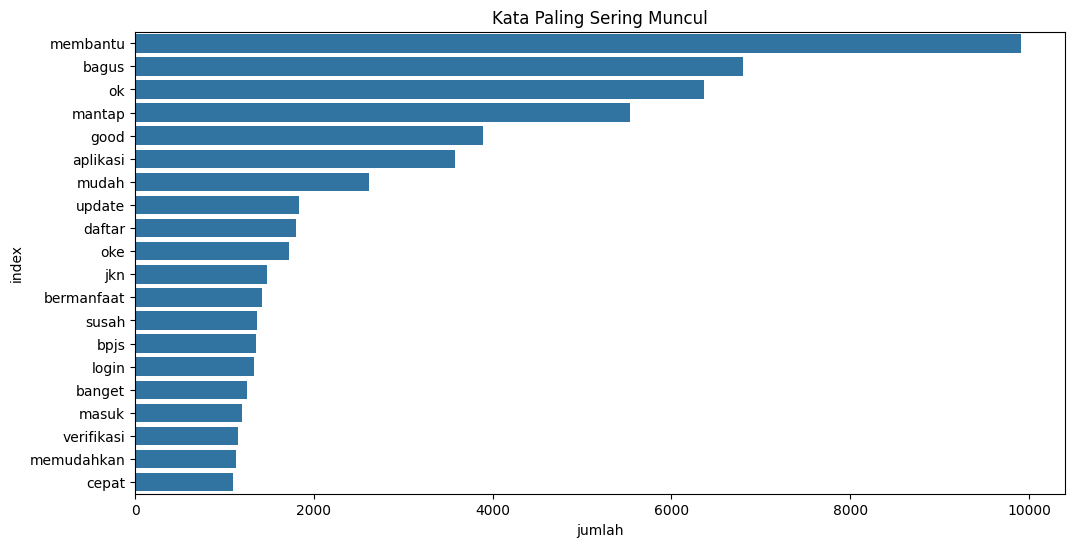

In [90]:
# Visualisasi distribusi kelas (Sentiment)
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='Sentiment', data=clean_df)  # Menggunakan kolom Sentiment
plt.title('Distribusi Kelas Sentimen')

# Menambahkan jumlah di atas batang pada plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Visualisasi distribusi panjang teks
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))  # Menghitung panjang teks
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjang Teks')
plt.show()

# Visualisasi kata-kata yang paling sering muncul
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()  # Menggunakan TF-IDF untuk mengekstrak fitur
X = vectorizer.fit_transform(clean_df['text_akhir'])  # Menggunakan kolom 'text_akhir'
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)  # Menyaring 20 kata paling sering
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata Paling Sering Muncul')
plt.show()


## **Data Splitting**

**Menampilkan Distribusi Sentimen pada Data**

In [92]:
clean_df['Sentiment'].value_counts()

,count
Sentiment,
Positif,89731
Netral,24909
Negatif,1006


In [93]:
# Mengambil kolom 'text_akhir' dan 'Sentiment' untuk ekstraksi fitur dan pelabelan
X = clean_df['text_akhir']
y = clean_df['Sentiment']

**Encoding Label**

In [94]:
# Melakukan encoding label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

**Pembagian Data Menjadi Training Set dan Testing Set**

In [95]:
# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


**Ekstraksi Fitur Menggunakan TF-IDF Vectorizer**

In [96]:
# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## **Pemodelan**

**Melatih dan Mengevaluasi Model Klasifikasi Sentimen dengan Akurasi dan F1-Score**

In [108]:
# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Melatih model pada training set
    model.fit(X_train, y_train)

    # Memprediksi pada training set dan testing set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Menghitung akurasi dan F1-Score pada training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Menghitung akurasi dan F1-Score pada testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Menampilkan hasil
    print(f"Model: {model.__class__.__name__}")
    print(f"Training Set - Akurasi: {train_accuracy:.2f}, F1-Score: {train_f1:.2f}")
    print(f"Testing Set - Akurasi: {test_accuracy:.2f}, F1-Score: {test_f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Cek apakah akurasi dan F1-Score memenuhi kriteria
    if test_accuracy >= 0.85 and test_f1 >= 0.85:
        print("Model memenuhi kriteria dengan akurasi dan F1-Score minimal 85%.")
    else:
        print("Model tidak memenuhi kriteria. Perlu dilakukan peningkatan model.")

### **Naive Bayes**

In [111]:
# Model Multinomial Naive Bayes
model_nb = MultinomialNB()
print("\nEvaluasi Model Multinomial Naive Bayes:")
train_and_evaluate_model(model_nb, X_train_tfidf, y_train, X_test_tfidf, y_test)


Evaluasi Model Multinomial Naive Bayes:
Model: MultinomialNB
Training Set - Akurasi: 0.87, F1-Score: 0.85
Testing Set - Akurasi: 0.86, F1-Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       189
           1       0.96      0.42      0.59      5014
           2       0.85      1.00      0.92     17927

    accuracy                           0.86     23130
   macro avg       0.94      0.47      0.51     23130
weighted avg       0.88      0.86      0.84     23130

Model tidak memenuhi kriteria. Perlu dilakukan peningkatan model.


## **Random Forest**

In [105]:
# Model Random Forest
model_rf = RandomForestClassifier(random_state=42)
print("\nEvaluasi Model Random Forest:")
train_and_evaluate_model(model_rf, X_train_tfidf, y_train, X_test_tfidf, y_test)



Evaluasi Model Random Forest:
Model: RandomForestClassifier
Training Set - Akurasi: 1.00, F1-Score: 1.00
Testing Set - Akurasi: 0.98, F1-Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       189
           1       0.96      0.97      0.97      5014
           2       0.99      0.99      0.99     17927

    accuracy                           0.98     23130
   macro avg       0.94      0.87      0.90     23130
weighted avg       0.98      0.98      0.98     23130

Model memenuhi kriteria dengan akurasi dan F1-Score minimal 85%.


## **Logistic Regression**

In [106]:
# Model Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
print("\nEvaluasi Model Logistic Regression:")
train_and_evaluate_model(model_lr, X_train_tfidf, y_train, X_test_tfidf, y_test)


Evaluasi Model Logistic Regression:
Model: LogisticRegression
Training Set - Akurasi: 0.99, F1-Score: 0.99
Testing Set - Akurasi: 0.99, F1-Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.63      0.76       189
           1       0.95      0.99      0.97      5014
           2       1.00      0.99      0.99     17927

    accuracy                           0.99     23130
   macro avg       0.96      0.87      0.91     23130
weighted avg       0.99      0.99      0.99     23130

Model memenuhi kriteria dengan akurasi dan F1-Score minimal 85%.


Dalam kasus Sentiment Analysis ini, evaluasi model menunjukkan bahwa Random Forest dan Logistic Regression memiliki performa sangat baik dengan akurasi dan F1-Score lebih dari 85%, memenuhi kriteria yang diinginkan. Keduanya memberikan hasil yang baik untuk semua kelas, terutama kelas netral dan positif. Sementara itu, Multinomial Naive Bayes memiliki akurasi dan F1-Score yang lebih rendah, tidak memenuhi kriteria, dan membutuhkan perbaikan lebih lanjut.

In [119]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.2.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.11
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2025.1.20.0.32.27
astunparse==1.6.3
atpublic==4.1.0
attrs==24.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.33.0
bigquery-magics==0.5.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.0.0
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.1
catalogue==2.0.10
certifi==2024.12.14
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.88
clarabel==0.9.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.4
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1.3.1
cryptography==4

In [121]:
from google.colab import files
files.download('requirements.txt')
print('Selesai')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Selesai
